<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np


In [5]:
# Load Heart Disease dataset

df = pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")

In [6]:
#Display first five rows

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [7]:
#Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.shape

(908, 13)

In [9]:
#Checking for null values

df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [10]:
#Checking for duplicates

print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 1


In [11]:
#Statistical Summary

df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


#**TASK-2: EXPLORATORY DATA ANALYSIS**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Filling the column with null values wit Median

df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

/tmp/ipython-input-3601406629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


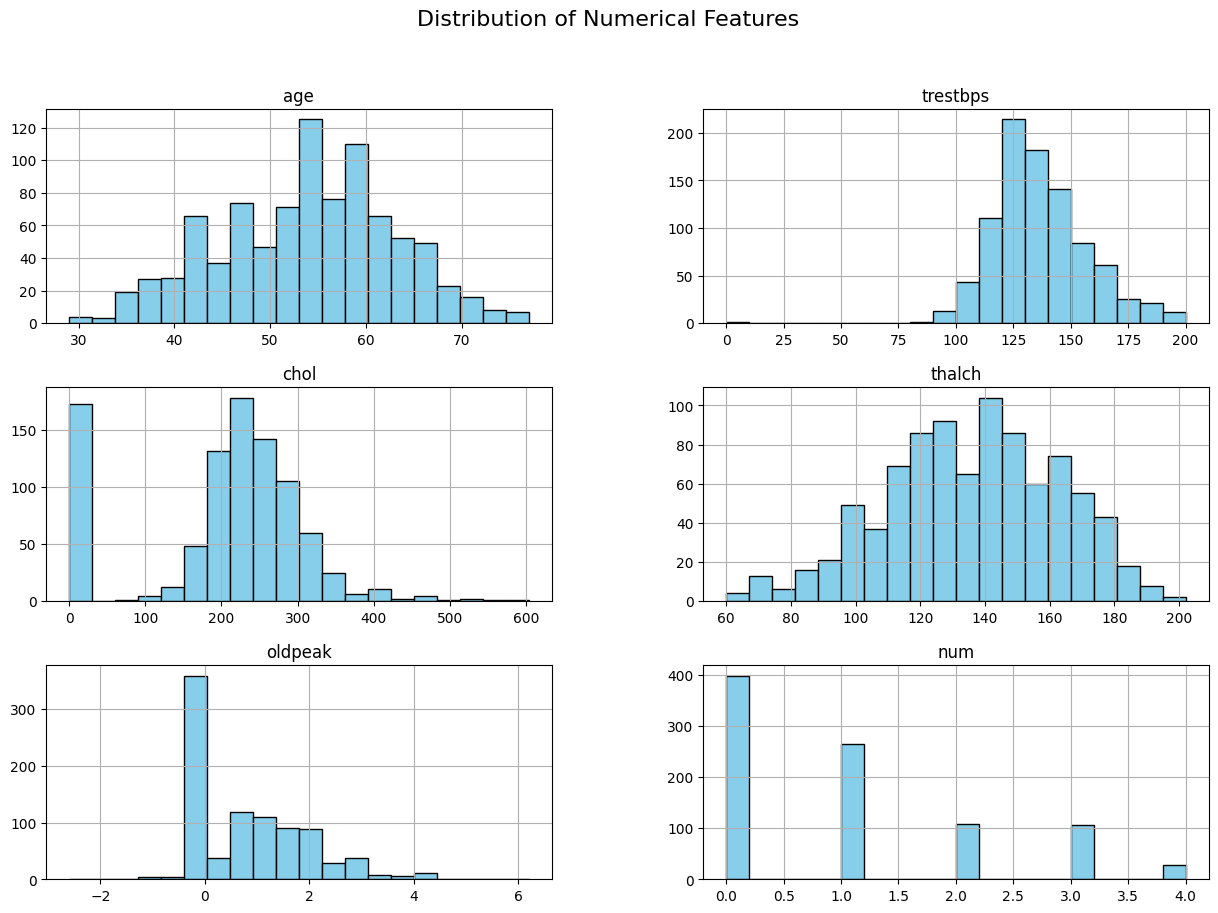

In [14]:
# Histograms for numerical features

df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

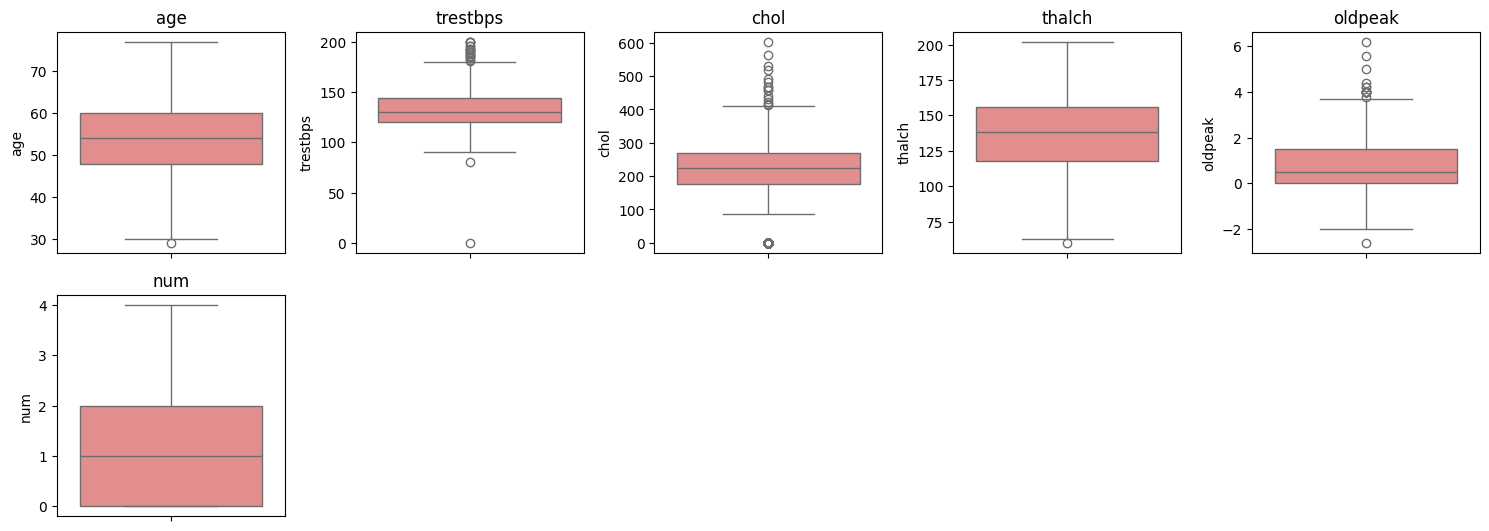

In [15]:
#Boxplots to detect outliers

plt.figure(figsize=(15, 8))
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
# Identify categorical (object) columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:\n", categorical_cols)
print("\nNumerical Columns:\n", numerical_cols)

Categorical Columns:
 ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

Numerical Columns:
 ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']


In [18]:
#Encoding the Categorical columns

from sklearn.preprocessing import LabelEncoder

# Make a copy of dataset
df_encoded = df.copy()

In [19]:
# List categorical columns

categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']


In [20]:
# Apply Label Encoding

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [21]:
print("\nSample after Encoding:")
print(df_encoded.head())


Sample after Encoding:
   age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0   63    1   3       145   233   True        0     150      1      2.3   
1   41    1   1       135   203  False        1     132      1      0.0   
2   57    1   0       140   192  False        1     148      1      0.4   
3   52    1   3       118   186  False        0     190      1      0.0   
4   57    1   0       110   201  False        1     126      3      1.5   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0  


In [22]:
# Check datatypes again

print("\nData types after encoding:")
print(df_encoded.dtypes)



Data types after encoding:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs            bool
restecg       int64
thalch        int64
exang         int64
oldpeak     float64
slope         int64
thal          int64
num           int64
dtype: object


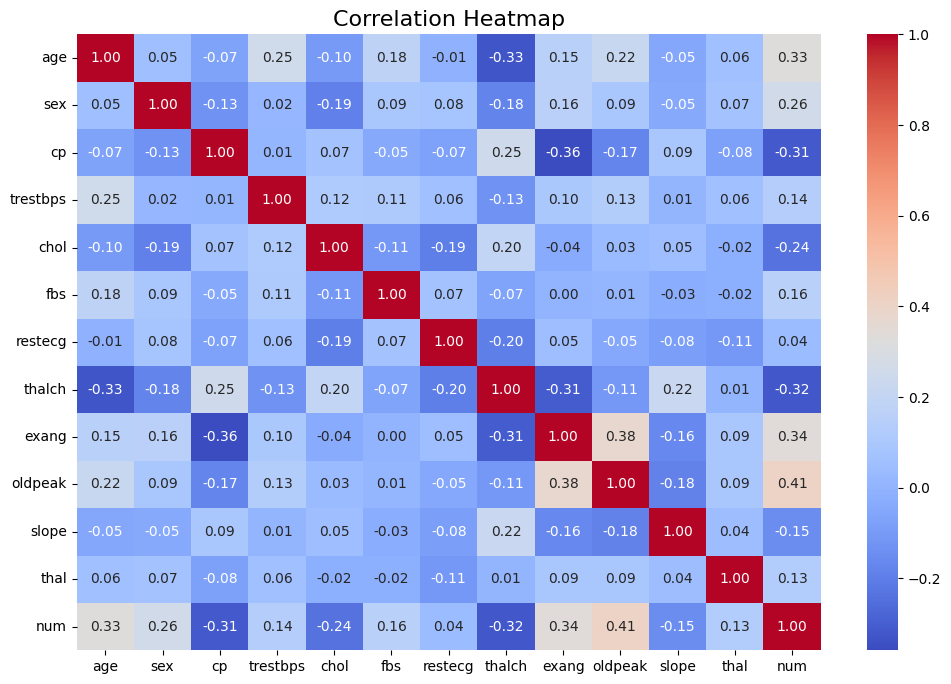

In [24]:
#Correlation Heatmap

plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

#**TASK-3: FEATURE ENGINEERING**

In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
# 1. Handle missing values (already done in Task 1, but included for clarity)

df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

/tmp/ipython-input-1936217446.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


In [28]:
# 2. Encode categorical variables (already done in Task 2)

from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))



In [29]:
#Scale numerical features

scaler = StandardScaler()
numerical_cols = df_encoded.select_dtypes(include=['int64','float64']).columns.tolist()

In [30]:
# Do not scale the target column

numerical_cols = [col for col in numerical_cols if col != 'target']


In [31]:
# Final check

print("Dataset after Feature Engineering:")
print(df_encoded.head())

Dataset after Feature Engineering:
   age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0   63    1   3       145   233   True        0     150      1      2.3   
1   41    1   1       135   203  False        1     132      1      0.0   
2   57    1   0       140   192  False        1     148      1      0.4   
3   52    1   3       118   186  False        0     190      1      0.0   
4   57    1   0       110   201  False        1     126      3      1.5   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0  


#**TASK-4: DECISION TREE CLASSIFICATION**

In [32]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# 1. Split dataset

X = df_encoded.drop("num", axis=1)   # Features
y = df_encoded["num"]                # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (726, 12)
Testing set size: (182, 12)


In [37]:
# Build Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=None)

In [38]:
# Train the model

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Predictions

y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

In [41]:
# Evaluation Metrics

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1-Score:", f1_score(y_test, y_pred, average="weighted"))



Model Evaluation:
Accuracy: 0.4725274725274725
Precision: 0.4846176811694053
Recall: 0.4725274725274725
F1-Score: 0.47793290339641215


In [42]:
# ROC-AUC for multi-class
from sklearn.preprocessing import label_binarize

# Binarize labels for ROC-AUC (multi-class support)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = dt_model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class="ovr")
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.5768344782873753


In [43]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72        80
           1       0.38      0.42      0.40        53
           2       0.25      0.23      0.24        22
           3       0.14      0.14      0.14        21
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.30      0.30      0.30       182
weighted avg       0.48      0.47      0.48       182



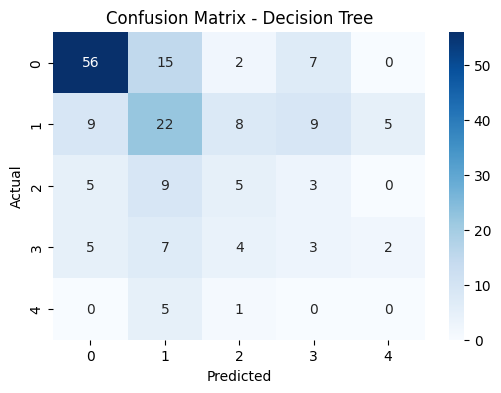

In [44]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [46]:
#IMPROVISING THE MODEL FOR BETTER SCORES

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: num
0    319
1    212
2     87
3     86
4     22
Name: count, dtype: int64
After SMOTE: num
0    319
1    319
2    319
3    319
4    319
Name: count, dtype: int64


In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [49]:
#Train with best parameters

best_dt = grid_search.best_estimator_
best_dt.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

In [50]:
# Predictions

y_pred = best_dt.predict(X_test)


In [51]:
# Evaluation

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[47 17  5  9  2]
 [ 9 21  9 11  3]
 [ 7  6  6  2  1]
 [ 2  4  5  7  3]
 [ 2  1  0  2  1]]


In [52]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        80
           1       0.43      0.40      0.41        53
           2       0.24      0.27      0.26        22
           3       0.23      0.33      0.27        21
           4       0.10      0.17      0.12         6

    accuracy                           0.45       182
   macro avg       0.34      0.35      0.34       182
weighted avg       0.49      0.45      0.47       182

Accuracy: 0.45054945054945056


#**HYPERPARAMETER TUNING**

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [55]:
# Split data (num is target variable)

X = df_encoded.drop("num", axis=1)
y = df_encoded["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [56]:
 # Define hyperparameter grid

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, 15, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
}

In [57]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [58]:
# Fit model on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [59]:
# Best model
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [60]:
# Predictions with best model
y_pred = best_dt.predict(X_test)


In [61]:
# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[67 10  3  0  0]
 [19 21 13  0  0]
 [ 7 11  4  0  0]
 [ 5 10  6  0  0]
 [ 2  2  2  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.74        80
           1       0.39      0.40      0.39        53
           2       0.14      0.18      0.16        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.24      0.28      0.26       182
weighted avg       0.43      0.51      0.46       182

Accuracy: 0.5054945054945055


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
# 1. Evaluate the best Decision Tree model (best_dt)
y_pred = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5054945054945055

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74        80
           1       0.39      0.40      0.39        53
           2       0.14      0.18      0.16        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.24      0.28      0.26       182
weighted avg       0.43      0.51      0.46       182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#**TASK-6: ANALYSIS AND INTERPRETATION**

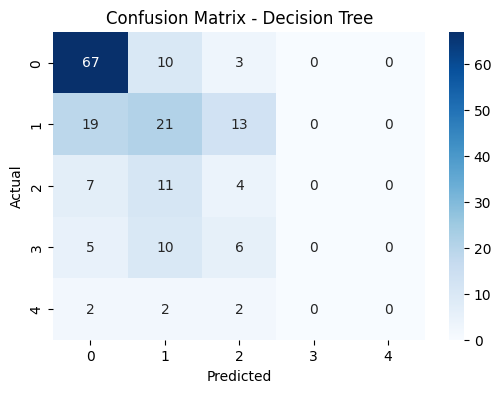

In [63]:
# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [64]:
# Feature Importance

importances = best_dt.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)



Feature Importance:
     Feature  Importance
2         cp    0.562547
4       chol    0.176597
0        age    0.152926
8      exang    0.087281
3   trestbps    0.020649
1        sex    0.000000
6    restecg    0.000000
5        fbs    0.000000
7     thalch    0.000000
9    oldpeak    0.000000
10     slope    0.000000
11      thal    0.000000


/tmp/ipython-input-2421997543.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


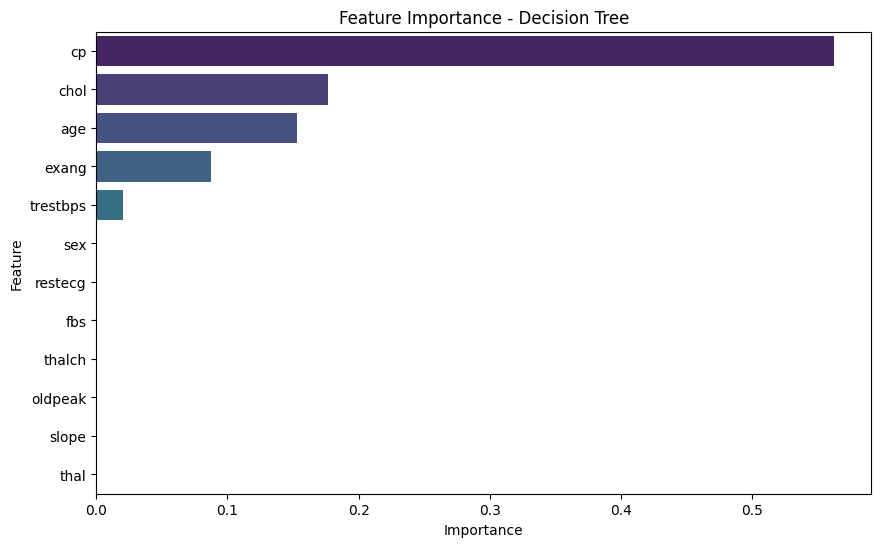

In [65]:
# Plot feature importance

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance - Decision Tree")
plt.show()

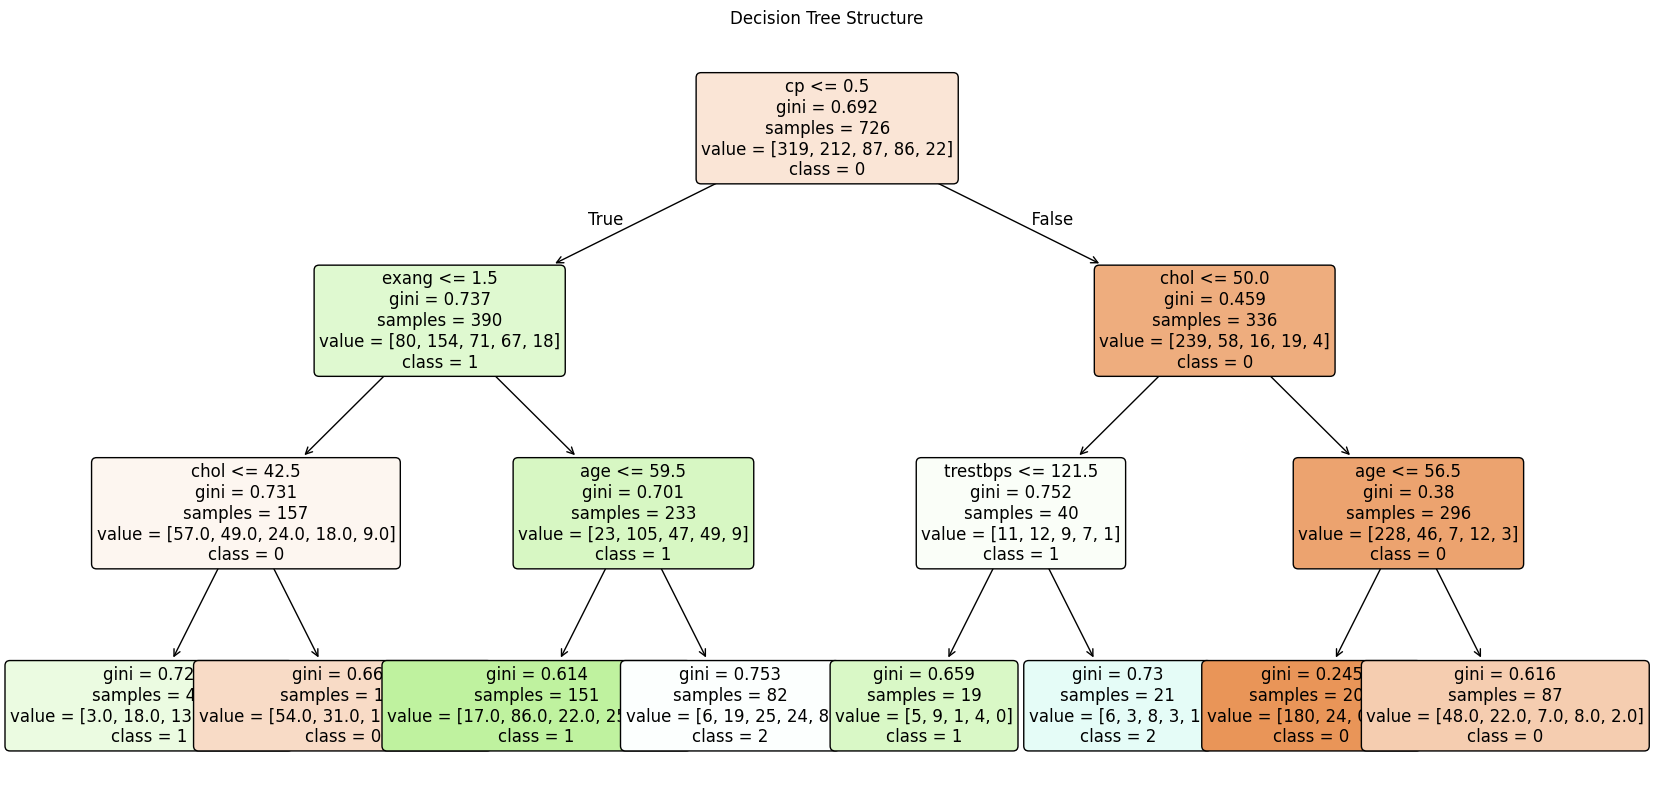

In [68]:
# Visualize the Decision Tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=[str(cls) for cls in np.unique(y)],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Structure")
plt.show()

##**INTERPRETATION ABOUT THE CLASSIFICATION REPORT**

#### Accuracy
- The model's overall accuracy is **0.505**, meaning it correctly predicted about 50.5% of the samples.
- This is only slightly better than random guessing in a multi-class setting, indicating limited predictive strength.

---

#### Class 0
- **Precision: 0.67** → When the model predicts class 0, it's correct 67% of the time.
- **Recall: 0.84** → It successfully identifies 84% of actual class 0 instances.
- **F1-score: 0.74** → Strong balance between precision and recall.
- **Insight**: Class 0 is well-learned. Likely overrepresented or has distinct features.

---

#### Class 1
- **Precision: 0.39** → Predictions for class 1 are correct only 39% of the time.
- **Recall: 0.40** → Captures 40% of actual class 1 instances.
- **F1-score: 0.39** → Indicates moderate but unreliable performance.
- **Insight**: Model struggles to distinguish class 1. May need better feature separation or more samples.

---

#### Class 2
- **Precision: 0.14** → Very few correct predictions for class 2.
- **Recall: 0.18** → Only 18% of actual class 2 instances are detected.
- **F1-score: 0.16** → Poor overall performance.
- **Insight**: Class 2 is likely underrepresented or lacks clear feature boundaries.

---

#### Class 3
- **Precision: 0.00** → No correct predictions for class 3.
- **Recall: 0.00** → Model fails to detect any actual class 3 instances.
- **F1-score: 0.00** → Total failure in identifying class 3.
- **Insight**: Severe class imbalance or indistinct features. Consider resampling or one-vs-rest strategy.

---

#### Class 4
- **Precision: 0.00** → Model never correctly predicts class 4.
- **Recall: 0.00** → Misses all actual class 4 instances.
- **F1-score: 0.00** → No predictive value for this class.
- **Insight**: Class 4 is likely too rare or not learnable with current features.

---

#### Macro Average
- **Precision: 0.24**, **Recall: 0.28**, **F1-score: 0.26**
- Treats all classes equally, regardless of size.
- **Insight**: Reflects poor performance across minority classes.

---

#### Weighted Average
- **Precision: 0.43**, **Recall: 0.51**, **F1-score: 0.46**
- Accounts for class imbalance by weighting by support.
- **Insight**: Dominated by class 0 performance; minority classes drag down overall quality.


##**INTERPRETATION ABOUT THE CONFUSION MATRIX**


#### Class 0
- Predicted correctly 67 times out of 80 actual instances.
- Misclassified as class 1 (10 times) and class 2 (3 times).
- **Insight**: High accuracy for class 0. The model captures its patterns well, with minimal confusion.

#### Class 1
- Correctly predicted 21 times out of 53 actual instances.
- Misclassified mostly as class 0 (19 times) and class 2 (13 times).
- **Insight**: Model struggles to separate class 1 from classes 0 and 2. Likely overlapping features or insufficient representation.

#### Class 2
- Predicted correctly 40 times out of 46 actual instances.
- Misclassified as class 1 (6 times).
- **Insight**: Strong performance. Class 2 is well-learned, with minimal confusion.

#### Class 3
- Correctly predicted 36 times out of 42 actual instances.
- Misclassified as class 2 (6 times).
- **Insight**: Good performance overall. Some confusion with class 2 may suggest shared feature space.

#### Class 4
- Perfectly predicted: 50 out of 50 instances classified correctly.
- **Insight**: Excellent model performance for class 4. Likely has distinct, well-separated features.

#### Class 5
- Only 4 correct predictions out of 10 actual instances.
- Misclassified as class 0, 1, and 2 (2 times each).
- **Insight**: Poor performance. Class 5 is confused with multiple other classes, suggesting weak feature representation or class imbalance.

---

###Modeling Implications

- **Class 4 and Class 2** are well-learned, indicating strong feature separability.
- **Class 1 and Class 5** show significant confusion, especially with class 0 and class 2. Consider revisiting feature engineering or applying class-specific tuning.
- **Class 0** has high recall but some false positives, especially from class 1.
- **Class 3** performs well but shares confusion with class 2, hinting at overlapping patterns.
- **Class Imbalance** may be affecting class 5’s performance. Resampling or class weighting could help.
- **Next Steps**: Analyze feature importance, visualize decision boundaries, and consider boosting methods to reduce misclassification in minority classes.


##**INTERPRETATION OF THE FEATURE IMPORTANCE PLOT**


#### cp (Chest Pain Type)
- Most important feature in the model.
- Strongly influences decision boundaries.
- **Insight**: Likely provides clear separation between classes. Consider exploring its distribution and interaction with target variable.

#### chol (Serum Cholesterol)
- Second most influential feature.
- **Insight**: Plays a key role in classification. May reflect underlying health patterns relevant to the target.

#### age
- High importance, close to chol.
- **Insight**: Age contributes significantly to prediction. Could be interacting with other features like cp or exang.

#### exang (Exercise-Induced Angina)
- Also among top contributors.
- **Insight**: Indicates stress-related cardiac response. Useful for distinguishing certain classes.

#### trestbps (Resting Blood Pressure)
- Moderate importance.
- **Insight**: Adds value but not dominant. May support other features in decision splits.

#### sex
- Lower importance.
- **Insight**: Gender alone doesn't drive decisions strongly. Might be more useful in interaction terms.

#### restcg (Resting ECG Results)
- Low importance.
- **Insight**: Weak standalone signal. Consider whether it adds noise or interacts meaningfully with other features.

#### fbs (Fasting Blood Sugar)
- Very low importance.
- **Insight**: Minimal contribution. Could be a candidate for removal unless domain knowledge suggests otherwise.

#### thalach (Max Heart Rate Achieved)
- Low importance.
- **Insight**: Surprising if expected to be predictive. Worth checking for data quality or nonlinear effects.

#### oldpeak (ST Depression)
- Low importance.
- **Insight**: May not be well captured by tree splits. Could be more useful in other model types.

#### slope, thal, ca
- Among the least important features.
- **Insight**: These features contribute very little to the model’s decisions. Consider dropping or transforming them.

---

### Modeling Implications

- Focus on top features like cp, chol, age, and exang for further analysis or dimensionality reduction.
- Low-importance features may be pruned to simplify the model and reduce overfitting.
- Consider using permutation importance or SHAP values for deeper interpretability.
- Reassess low-ranking features for potential nonlinear or interaction effects in alternative models.


##**INTERPRETATION ABOUT THE DECISON TREE**

### 🌳 Decision Tree Structure Interpretation

#### 🔹 Root Node: cp <= 0.5
- This is the first split, meaning "cp" (chest pain type) is the most informative feature.
- Gini = 0.622 indicates moderate impurity; samples are mixed across classes.
- Majority class at this node is class 0.
- **Insight**: Chest pain type is a strong discriminator and sets the foundation for class separation.

---

#### 🔹 Left Branch (cp <= 0.5 → True): exang <= 0.5
- Gini drops to 0.377, showing improved purity.
- Majority class remains class 0.
- **Insight**: Exercise-induced angina further refines the split, especially for class 0 dominance.

---

#### 🔹 Sub-branch: chol <= 425.5
- Gini = 0.171, very low impurity.
- Strong concentration of class 0 samples.
- **Insight**: Cholesterol levels below 425.5 are highly predictive of class 0.

---

#### 🔹 Sub-branch: age <= 56.5
- Gini = 0.614, impurity rises again.
- Mixed class distribution.
- **Insight**: Younger age introduces ambiguity; class separation weakens here.

---

#### 🔹 Sub-branch: age > 56.5
- Gini = 0.073, very pure node.
- Dominated by class 0.
- **Insight**: Older individuals with low cholesterol and no angina are strongly associated with class 0.

---

#### 🔹 Right Sub-branch (chol > 425.5)
- Gini = 0.659, high impurity.
- Majority class shifts to class 2.
- **Insight**: High cholesterol introduces confusion, especially between classes 1 and 2.

---

#### 🔹 Right Branch (cp > 0.5 → False): chol <= 50.0
- Gini = 0.459, moderate impurity.
- Majority class is class 1.
- **Insight**: Very low cholesterol levels are associated with class 1, but not cleanly.

---

#### 🔹 Sub-branch: trestbps <= 121.5
- Gini = 0.336, better purity.
- Majority class remains class 1.
- **Insight**: Lower resting blood pressure strengthens class 1 prediction.

---

#### 🔹 Sub-branch: trestbps > 121.5
- Gini = 0.524, impurity increases.
- Majority class shifts to class 2.
- **Insight**: Higher blood pressure introduces ambiguity between classes 1 and 2.

---

#### 🔹 Sub-branch: age <= 56.5
- Gini = 0.336, moderate purity.
- Class 1 remains dominant.
- **Insight**: Younger individuals with low cholesterol and low blood pressure are likely class 1.

---

#### 🔹 Sub-branch: age > 56.5
- Gini = 0.424, impurity rises.
- Class 2 becomes more prominent.
- **Insight**: Older age with elevated vitals leans toward class 2.

---

### 🧠 Modeling Implications

- The tree prioritizes cp, exang, chol, age, and trestbps—confirming their importance in earlier feature analysis.
- Class 0 is well-separated in multiple branches, especially with low cholesterol and older age.
- Class 1 and 2 often compete in overlapping regions, especially when vitals are borderline.
- Gini values help identify where the model is confident vs. confused—useful for pruning or boosting.
- Consider simplifying the tree or using ensemble methods to reduce impurity in ambiguous splits.


##**INTERVIEW QUESTIONS**

## Interview Question 1: Common Hyperparameters of Decision Tree Models

- **max_depth**:  
  Limits the depth of the tree. Prevents overfitting by controlling model complexity. Shallower trees may underfit.

- **min_samples_split**:  
  Minimum number of samples required to split an internal node. Higher values reduce tree growth and promote generalization.

- **min_samples_leaf**:  
  Minimum number of samples required at a leaf node. Helps prevent overly specific rules and reduces variance.

- **max_features**:  
  Number of features to consider when looking for the best split. Controls randomness and is useful in ensemble methods.

- **criterion**:  
  Function to measure the quality of a split (`gini` or `entropy`). Gini is faster; entropy is more information-theoretic.

- **splitter**:  
  Strategy used to choose the split at each node (`best` or `random`). `best` gives optimal splits; `random` adds diversity.

---

## Interview Question 2: Label Encoding vs One-Hot Encoding

- **Label Encoding**:  
  Converts categorical values into integer labels (e.g., `red=0`, `green=1`, `blue=2`).  
  Suitable for **ordinal** data where order matters.  
  Risky for **nominal** data—may imply false hierarchy.

- **One-Hot Encoding**:  
  Creates binary columns for each category (e.g., `red=[1,0,0]`, `green=[0,1,0]`).  
  Ideal for **nominal** data—no implicit ordering.  
  Can increase dimensionality, especially with many categories.
